In [1]:
import pandas as pd
import numpy as np

In [2]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
all_data.shape

(10000, 55)

In [4]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [5]:
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=1)
# обучение модели
clf.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = clf.predict(test_feature_matrix)

D:\Anaconda\envs\directml2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# заново создадим модель, указав солвер
clf = LogisticRegression(solver='saga', verbose=1)

# опишем сетку, по которой будем искать
param_grid = {
    'C': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy', verbose=1)

# запустим поиск
search.fit(feature_matrix, labels)

# выведем наилучшие параметры
print(search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds
{'C': 3, 'penalty': 'l2'}


D:\Anaconda\envs\directml2\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


In [13]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6419

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
clf = KNeighborsClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV
params =  {
    'n_neighbors': np.arange(1, 11), # также можно указать обычный массив, [1, 2, 3, 4]
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)
# Теперь обучение. Ваш код здесь

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [18]:
clf_grid.best_score_

0.7669999999999999

In [19]:
accuracy_score(test_labels, clf_grid.best_estimator_.predict(test_feature_matrix))

0.785

In [20]:
m = clf_grid.best_estimator_.predict(feature_matrix) - labels

In [21]:
m.mean()

-0.0204

In [22]:
optimal_clf = clf_grid.best_estimator_

In [23]:
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

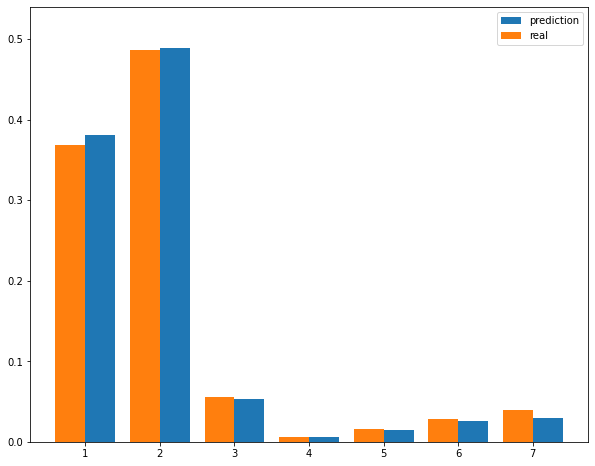

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [25]:
freq

[0.368, 0.4865, 0.0555, 0.0055, 0.0165, 0.028, 0.04]

In [26]:
unique, freq = np.unique(test_labels, return_counts=True)
freq/np.sum(freq)

array([0.368 , 0.4865, 0.0555, 0.0055, 0.0165, 0.028 , 0.04  ])

In [27]:
pred_freq = pred_prob.mean(axis=0)
pred_freq

array([0.38149113, 0.48914852, 0.05281153, 0.00581434, 0.01521326,
       0.02623053, 0.02929069])